<h1>Chapter3 Statistics-Summarizing Categorical Variables : Ravi Mummigatti : 23-12-20<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Nominal-categories" data-toc-modified-id="Nominal-categories-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nominal categories</a></span></li><li><span><a href="#Ordinal-Categorical-Variables" data-toc-modified-id="Ordinal-Categorical-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ordinal Categorical Variables</a></span></li><li><span><a href="#Table-of-Proportions" data-toc-modified-id="Table-of-Proportions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Table of Proportions</a></span></li><li><span><a href="#Binary-Categorical-Variables" data-toc-modified-id="Binary-Categorical-Variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Binary Categorical Variables</a></span></li><li><span><a href="#Project-Cars-Evaluation" data-toc-modified-id="Project-Cars-Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Project Cars Evaluation</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Introduction  
When exploring data, we’re often interested in summarizing a large amount of information with a single number or visualization.

Depending on what we’re trying to understand from our data, we may need to rely on different statistics. For quantitative data, we can summarize central tendency using mean, median or mode and we can summarize spread using standard deviation, variance, or percentiles. However, when working with categorical data, we may not be able to use all the same summary statistics.    
For example, here are the first five rows and some selected columns of a dataset from the 1994 U.S. census:  
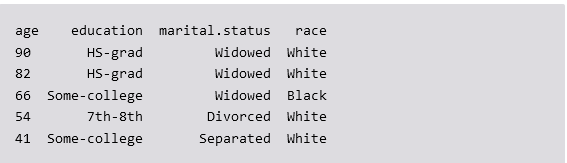  
Age is a quantitative variable, so we can calculate the average (or mean) age. However, for a variable like marital.status, we can’t calculate something like "average marital status" because the possible values of marital status are categories rather than numbers (e.g. "Married", "Widowed", "Seperated", etc.)  

The dataset we’ll explore is a sample of the NYC 2015 Tree Census. This dataset contains information from a survey of trees in the city collected by parks department employees and community volunteers  

*Dataset description :*     
tree_id:Unique identifier for each tree in the survey  
trunk_diam:Diameter of the tree measured 54” above the ground    
status:Indicates whether the tree is alive, standing dead, or a stump.  
health:Indicates the user’s perception of tree health.  
spc_common:Common name for species, e.g. “red maple”  
neighborhood:Name of the neighborhood the tree is located in  


In [1]:
# import packages
import pandas as pd
import numpy as np

In [2]:
# load the data and review 1st 5 rows
trees = pd.read_csv("nyc_trees.csv")

trees.head()

,tree_id,trunk_diam,status,health,spc_common,neighborhood
0,199250,8,Alive,Good,crab apple,Lincoln Square
1,136891,17,Alive,Good,honeylocust,East Harlem North
2,200218,3,Alive,Good,ginkgo,Chinatown
3,53901,23,Alive,Good,green ash,Bayside-Bayside Hills
4,589218,21,Alive,Good,pin oak,Glen Oaks-Floral Park-New Hyde Park


**Question : Which columns are categorical vars?**  
**Answer : status , health , spc_common , neighborhood**  

# Nominal categories  
Depending on the data, some of the summary statistics we use for quantitative data can still be meaningful for categorical data. Let’s first consider a nominal categorical variable. **A nominal categorical variable is a categorical variable with no intrinsic ordering to the categories**. Examples from the census dataset introduced in the previous exercise include marital.status and race.  

Because these variables’ categories have no ordering or numeric equivalents, it would also be impossible to describe central tendency(mean or median) and spread (variance, standard deviation, a range, IQR, or percentiles). However, it is still possible to calculate the mode, the most common value in the dataset.  

We use the **.value_counts()** function from Python , which calculates the count of each value in a column and returns the result as a series. *By default, .value_counts() orders categories in descending order by frequency, thus the top row in the output will be the mode.*   

In the code below, we use .value_counts() to extract the most common responses in the field marital.status:  
counts = df['marital.status'].value_counts()  
print(counts)  
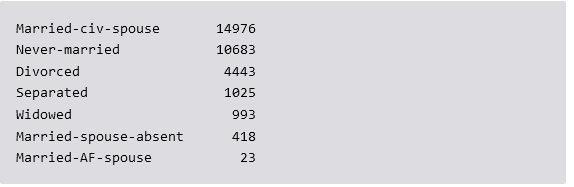  

The most common value of marital.status in this dataset is 'Married-civ-spouse' (married to a civilian spouse), with 14976 observations in that category.   
We can also extract the name of the modal category by taking the first value from the series .value_counts() returns.   

modal_cat = counts.index[0]  
print(modal_cat)  

We are using the nyc_trees data, find the count of trees in each neighborhood. 
We will save the result as tree_counts and print the result

In [3]:
# Get tree counts by neighborhood
tree_counts = trees['neighborhood'].value_counts()
print(tree_counts)

Annadale-Huguenot-Prince's Bay-Eltingville    950
Great Kills                                   761
East New York                                 702
Bayside-Bayside Hills                         665
Rossville-Woodrow                             633
                                             ... 
67                                              1
48                                              1
87                                              1
69                                              1
75                                              1
Name: neighborhood, Length: 442, dtype: int64


In [4]:
# Get neighborhoods with most trees
greenest_neighborhood =  tree_counts.index[0] # contents at 1st index
count_highest = tree_counts.iloc[0] # get contents at location of 1st index (1st row 1st column")
print("The Greenest neighborhood is " + str(greenest_neighborhood) + " that has " + str(count_highest) + " trees")

The Greenest neighborhood is Annadale-Huguenot-Prince's Bay-Eltingville that has 950 trees


# Ordinal Categorical Variables  
**Ordinal categorical variables have ordered categories**. For ordinal categorical variables, we can find the modal category and also calculate other summary statistics that are not possible for nominal categorical variables. For central tendency, this means we can also calculate a median.


**Categorical Data Spread :  
Calculating a mean for ordinal variables would be inappropriate because the spacing between categories may be uneven. Since standard deviation and variance both depend on the mean, these statistics should not be used to summarize categorical data. Instead, measures of spread for ordinal categorical data include percentiles and range.**  

**Central Tendency of Ordinal Categorical Data :  
For ordinal categorical data, both the median and mode can be calculated as measures of central tendency; a mean is not appropriate because it assumes equal spacing between categories. For nominal categorical data, the mode is calculable and interpretable (as the most common recorded value), but the mean and median are not.**  

**Encoding Ordinal Categorical Data :  
In order to calculate summary statistics for ordinal categorical data (eg., a median or percentile), many functions, like np.median, require numeric inputs. It is therefore helpful to store category names both as strings and as numerical values (eg., integer or float data types). This can be done using label encoding (in Pandas, using the cat.codes attribute of a ‘category’ dataframe column). For example, suppose there is a variable named response in a dataframe named df that contains responses to the question “Rate your agreement with the statement: the wealthy should pay higher taxes,” where the response options are “strongly disagree”, “disagree”, “neutral”, “agree” and “strongly agree”. The provided code can be used to calculate the median category for this data.**  

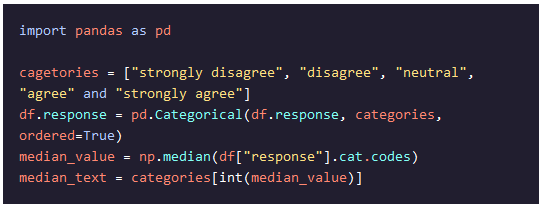



**Categorical Data Frequencies:  
One way to summarize a categorical variable is to compute the frequencies of the categories. For further summarization, the frequency of the modal category (most frequent category) is often reported. For example, when analyzing a dataset with an education level variable (highschool, associates, bachelors, masters, etc.), we could calculate the frequency of each category and report the most common category. For a pandas dataframe, we can use the .value_counts() method on a column of data to calculate the frequencies of the categories.**  
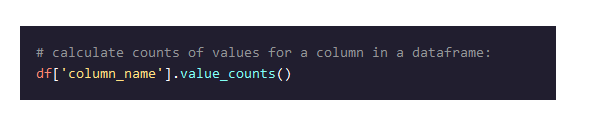


**Ordinal Category : Central Tendency : Median**  
In order to calculate numerical statistics for ordered categories, we need to first assign numerical values to the categories.  
1. We can inspect the unique categories in this variable using .unique()  
2. We can associate each of these categories with a numerical value, indicating an individual’s level. The easiest way to do this is to convert the variable to type 'category' using pandas.Categorical().   
3. When converting a column to type 'category', we can also pass a list with the column’s categories to indicate the desired ordering.  
4. Variables stored as type category have an attribute (cat.codes) that converts the categories to numbers. This allows us to perform numerical operations on this categorical field. This allows us to calculate the median category using numpy’s median() function.  

1. Using the NYC trees dataset, find the unique values in the column health.and save it to a variable tree_health_statuses and print the result.

In [5]:
# tree health uniques 
tree_health_statuses = trees['health'].unique()
print(tree_health_statuses)

['Good' 'Poor' 'Fair' nan]


2. Create a list named health_categories which lists the categories from worst to best. You should exclude NaN values from your list

In [6]:
# ordered list of health categories
health_categories = ['Poor' , 'Fair' , 'Good']

3. Using the health_categories list you created, convert health in the original dataset to a categorical variable type ('category').

In [7]:
# convert to categorical using pd.Categorical method and pass the ordered list
trees['health'] = pd.Categorical(trees['health'] , health_categories , ordered = True)

4. Using cat.codes, calculate the value that corresponds to the median value of health.  
5. Save it as a variable named median_health_status and print the result

In [8]:
trees.head()

,tree_id,trunk_diam,status,health,spc_common,neighborhood
0,199250,8,Alive,Good,crab apple,Lincoln Square
1,136891,17,Alive,Good,honeylocust,East Harlem North
2,200218,3,Alive,Good,ginkgo,Chinatown
3,53901,23,Alive,Good,green ash,Bayside-Bayside Hills
4,589218,21,Alive,Good,pin oak,Glen Oaks-Floral Park-New Hyde Park


In [9]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   tree_id       50000 non-null  int64   
 1   trunk_diam    50000 non-null  int64   
 2   status        50000 non-null  object  
 3   health        47695 non-null  category
 4   spc_common    47695 non-null  object  
 5   neighborhood  50000 non-null  object  
dtypes: category(1), int64(2), object(3)
memory usage: 2.0+ MB


In [10]:
#Calculate the median value of the category codes using np.median() by applying .cat.codes() to health column
median_index = np.median(trees['health'].cat.codes)

#Map that value to a category code by indexing that value in health_categories
median_health_status = health_categories[int(median_index)]

#Print the value
print(median_health_status)

Good


6. Validate the results by adding a column "health_cat"

In [11]:
# add a column in dataframe named health_cat that has categorical encoded values of health
trees['health_cat'] = trees['health'].cat.codes
trees.head()

,tree_id,trunk_diam,status,health,spc_common,neighborhood,health_cat
0,199250,8,Alive,Good,crab apple,Lincoln Square,2
1,136891,17,Alive,Good,honeylocust,East Harlem North,2
2,200218,3,Alive,Good,ginkgo,Chinatown,2
3,53901,23,Alive,Good,green ash,Bayside-Bayside Hills,2
4,589218,21,Alive,Good,pin oak,Glen Oaks-Floral Park-New Hyde Park,2


In [12]:
np.median(trees['health_cat'])

2.0

**Why not Mean for Ordinal Encoded Variables**  
We can use cat.codes to return numeric values and perform a wide range of operations on categorical data as well. However, before performing any operations, you should check to make sure they make sense in the context of the data.  

When we use .cat.codes to translate categories into integers, those integers have equal spacing. While translating categories to numbers is often necessary to store and use the order of the categories (for calculating a statistic like the median, which only relies on ordering, not spacing), we should not use those numbers to calculate statistics — such as the mean — for which the distance between values matters.

In practice, researchers sometimes (albeit, incorrectly) report means for ordinal categories. For example, a researcher might want to analyze survey responses to the question "Rate your happiness on a scale from 1 to 5 where 1 means 'very unhappy' and 5 means 'very happy'".  
If that researcher calculates 'mean happiness score', they are assuming that the difference in happiness between a rating of 1 and 2 is the same as the difference in happiness for a rating of 3 and 4. In practice, this assumption is likely not true and should be acknowledged if reporting a mean of an ordinal categorical variable

We will validate this through the trees dataset that now contains two variables related to trunk size. The first variable, trunk_diam contains the diameter of the trunk (in inches) for each tree. The variable tree_diam_category, on the other hand, categorizes each tree based on the size of the trunk. The categories are: 'Small (0-3in)', 'Medium (3-10in)', 'Medium-Large (10-18in)', 'Large (18-24in)','Very large (>24in)'. You’ll notice that these categories are not evenly spaced with respect to diameter.

In [13]:
import pandas as pd
import numpy as np

# Read NYC Trees2 Data
trees_coded = pd.read_excel("nyc_trees_diam_label_encoded.xlsx")
trees_coded.head()

,tree_id,trunk_diam,tree_diam_category,status,health,spc_common,neighborhood
0,199250,8,Medium-Large (10-18in),Alive,Good,crab apple,Lincoln Square
1,136891,17,Large (18-24in),Alive,Good,honeylocust,East Harlem North
2,200218,3,Medium (3-10in),Alive,Good,ginkgo,Chinatown
3,53901,23,Very large (>24in),Alive,Good,green ash,Bayside-Bayside Hills
4,589218,21,Very large (>24in),Alive,Good,pin oak,Glen Oaks-Floral Park-New Hyde Park


In [14]:
trees_coded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tree_id             50000 non-null  int64 
 1   trunk_diam          50000 non-null  int64 
 2   tree_diam_category  45432 non-null  object
 3   status              50000 non-null  object
 4   health              47695 non-null  object
 5   spc_common          47695 non-null  object
 6   neighborhood        50000 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


In [15]:
trees_coded['tree_diam_category'].value_counts()

Medium-Large (10-18in)    18870
Large (18-24in)           13298
Medium (3-10in)            7351
Very large (>24in)         4556
Small (0-3in)              1357
Name: tree_diam_category, dtype: int64

In [16]:
# Label Encode the tree_diam_categorical column with defined order and convert to categorical
trees_coded.tree_diam_category = pd.Categorical(trees_coded.tree_diam_category, 
                                              ['Small (0-3in)', 'Medium (3-10in)', 'Medium-Large (10-18in)', 
                                               'Large (18-24in)','Very large (>24in)'], ordered=True)

In [17]:
trees_coded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tree_id             50000 non-null  int64   
 1   trunk_diam          50000 non-null  int64   
 2   tree_diam_category  45432 non-null  category
 3   status              50000 non-null  object  
 4   health              47695 non-null  object  
 5   spc_common          47695 non-null  object  
 6   neighborhood        50000 non-null  object  
dtypes: category(1), int64(2), object(4)
memory usage: 2.3+ MB


In [18]:
# Get Mean Diam of diameter variable, `trunk_diam`
mean_diam_numerical_column = np.mean(trees_coded['trunk_diam'])
print(mean_diam_numerical_column)

11.27048


In [19]:
# Get Mean Category of `tree_diam_category`
mean_diam_cat = np.mean(trees_coded['tree_diam_category'].cat.codes)
print(mean_diam_cat)

1.97282


In [20]:
trees_coded.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tree_id,50000,NaN,NaN,NaN,365678,207790,48,187888,367660,546057,722686
trunk_diam,50000,NaN,NaN,NaN,11.2705,8.99711,0,4,9,16,389
tree_diam_category,45432,5,Medium-Large (10-18in),18870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,50000,3,Alive,47695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
health,47695,3,Good,38680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spc_common,47695,131,London planetree,6472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,50000,442,Annadale-Huguenot-Prince's Bay-Eltingville,950,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Inference :  
1. Calculating Mean Diameter from Numeric Column gives 11.27 i.e. "Large" which falls in "Most Frequent" category  
2. Calculating Mean Diameter for the encoded column gives 1.97 i.e. "Small" which is incorrect

**Ordinal Category : Spread : Range / Percentile**  
We learned that the mean is not interpretable for ordinal categorical variables because the mean relies on the assumption of equal spacing between categories.Many other statistics we might normally use for numerical data rely on the mean. Because of this, these statistics aren’t appropriate for ordinal data a.k.a. standard deviation and variance both depend on the mean, without a mean, we can’t have a reliable standard deviation or variance either!  
Instead, we can rely on other summary statistics, like the proportion of the data within a range,percentiles/quantiles.


Calculate the 25th percentile for tree_diam_category.  
We will use the ordered list, size_labels_ordered, to find the corresponding label.  
Save your result (the label, not the index) to a variable named p25_tree_diam_category and print it to the console.

In [21]:
import pandas as pd
import numpy as np

# Read NYC Trees Data
nyc_trees = pd.read_excel("nyc_trees_diam_label_encoded.xlsx")

# Head
nyc_trees.head()

,tree_id,trunk_diam,tree_diam_category,status,health,spc_common,neighborhood
0,199250,8,Medium-Large (10-18in),Alive,Good,crab apple,Lincoln Square
1,136891,17,Large (18-24in),Alive,Good,honeylocust,East Harlem North
2,200218,3,Medium (3-10in),Alive,Good,ginkgo,Chinatown
3,53901,23,Very large (>24in),Alive,Good,green ash,Bayside-Bayside Hills
4,589218,21,Very large (>24in),Alive,Good,pin oak,Glen Oaks-Floral Park-New Hyde Park


In [22]:
# ordered list of size categories
size_labels_ordered = ['Small (0-3in)', 'Medium (3-10in)', 'Medium-Large (10-18in)', 
                       'Large (18-24in)','Very large (>24in)']

In [23]:
# convert to categorical using pd.Categorical method and pass the ordered list
nyc_trees['tree_diam_category'] = pd.Categorical(nyc_trees['tree_diam_category'] , 
                                                 size_labels_ordered , ordered = True)

In [24]:
# review
nyc_trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tree_id             50000 non-null  int64   
 1   trunk_diam          50000 non-null  int64   
 2   tree_diam_category  45432 non-null  category
 3   status              50000 non-null  object  
 4   health              47695 non-null  object  
 5   spc_common          47695 non-null  object  
 6   neighborhood        50000 non-null  object  
dtypes: category(1), int64(2), object(4)
memory usage: 2.3+ MB


In [25]:
# Calculate 25th Percentile Category
# Apply np.percentile() by applying .cat.codes() to tree_diam_category
p25_ind = np.percentile(nyc_trees['tree_diam_category'].cat.codes, 25)

# Map that value to a category code by indexing that value in health_categories
p25_tree_diam_category = size_labels_ordered[int(p25_ind)]

# Print the result
print(p25_tree_diam_category)

Medium (3-10in)


In [26]:
# Calculate 75th Percentile Category
# Apply np.percentile() by applying .cat.codes() to tree_diam_category
p75_ind = np.percentile(nyc_trees['tree_diam_category'].cat.codes, 75)

# Map that value to a category code by indexing that value in health_categories
p75_tree_diam_category = size_labels_ordered[int(p75_ind)]

# Print the result
print(p75_tree_diam_category)

Large (18-24in)


In [27]:
# Calculate the InterQuartile Range
p_iqr = p75_ind - p25_ind

# Map that value to a category code by indexing that value in health_categories
p_IQR = size_labels_ordered[int(p_iqr)]

# Print the result
print(p_IQR)

Medium-Large (10-18in)


# Table of Proportions  
We’ve already seen that we can use the .value_counts() function to get a table of frequencies for a categorical variable. **A table of frequencies is often the first approach a data scientist might use to summarize a categorical variable; however, it is sometimes useful to instead look at the proportion of values in each category.**

For example, knowing that there are 14976 people in the census dataset who are married to a civilian spouse is hard to interpret without the context of knowing the numbers in the other categories. Instead, if we know that 32% of the surveyed population is married to a civilian spouse, we have more context about the relative frequency of this category. We can calculate proportions by dividing the frequency by the number of observations in the data.  

**We can also calculate proportions using .value_counts() by setting the normalize parameter equal to True**  
**Dealing with missing data : By default, those missing values are not counted by .value_counts().You can set the dropna parameter in .value_counts() to True if you want missing values to be included while calculating proportions or set it to False is you want to exclude missing values**.  
**df['column_name'].value_counts(normalize=True) will ignore missing data and divide the frequency of each category by the total in any category**  
**If we use dropna=False in value_counts(), then we’re calculating the proportion of all values regradless of their missingness**

Calculate a table of proportions for the status column. Save this table of proportions as tree_status_proportions and print the result.

In [28]:
trees.head()

,tree_id,trunk_diam,status,health,spc_common,neighborhood,health_cat
0,199250,8,Alive,Good,crab apple,Lincoln Square,2
1,136891,17,Alive,Good,honeylocust,East Harlem North,2
2,200218,3,Alive,Good,ginkgo,Chinatown,2
3,53901,23,Alive,Good,green ash,Bayside-Bayside Hills,2
4,589218,21,Alive,Good,pin oak,Glen Oaks-Floral Park-New Hyde Park,2


In [29]:
trees['status'].value_counts()

Alive    47695
Stump     1335
Dead       970
Name: status, dtype: int64

In [30]:
status_proportions = trees['status'].value_counts(normalize=True)
status_proportions

Alive    0.9539
Stump    0.0267
Dead     0.0194
Name: status, dtype: float64

Calculate the proportions for each category in the health variable.The denominator for your proportions should be the number of non-missing values in the health column

In [39]:
# health proportions without missing values counted
health_proportions = trees['health'].value_counts(normalize = True)
health_counts = trees['health'].value_counts()
print(health_counts)
print(health_proportions)

Good    38680
Fair     7005
Poor     2010
Name: health, dtype: int64
Good    0.810986
Fair    0.146871
Poor    0.042143
Name: health, dtype: float64


**Interpretation : Among tress with recorded health status, 81% are in Good health**

Add a parameter to include missing values in the denominator when calculating proportions for the health variable. Save the result to a dataframe named health_proportions_2

In [48]:
# health proportions with missing values counted
health_proportions_2 = trees['health'].value_counts(normalize = True , dropna = False)
print(health_proportions_2)

Good    0.7736
Fair    0.1401
NaN     0.0461
Poor    0.0402
Name: health, dtype: float64


**Interpretation : Of all trees surveyed , 771% are in Good health**

In [42]:
# how many missing values
trees['health'].isnull().sum()

2305

In [46]:
# alternate method for proportion of counts with missing value rows counted
trees['health'].value_counts()/trees['health'].value_counts().sum()

Good    0.810986
Fair    0.146871
Poor    0.042143
Name: health, dtype: float64

In [47]:
# alternate method
trees['health'].value_counts()/len(trees['health'])

Good    0.7736
Fair    0.1401
Poor    0.0402
Name: health, dtype: float64

# Binary Categorical Variables  
**Binary categorical variables have only two categories and are often coded as 0/1 or True/False.** This makes it easy to calculate the frequency/proportion of these variables in a dataset. For example, consider a variable income_>50K, which is equal to 1 if a person makes more than 50k U.S.D per year, and 0 otherwise. If we add up all the 1s and 0s in this column, the sum will be exactly equal to the number of 1s (people making more than 50k):  
*np.sum(df['income_>50K'])  #output: 7841*  
In Python, the same behavior holds for columns coded as True/False because **True gets coerced to 1 and False gets coerced to 0** (this is also true in most other programming languages used by data scientists). Similarly, we can calculate the proportion equal to 1 or True by taking the mean of the column. This works because the mean is just the sum of all values in the column (which is the frequency of 1s or Trues) divided by the number of values in the column  
*np.mean(df['income_>50K'])  #output: 0.24*    
We can make use of this nifty trick for any variable by using a conditional to translate a non-binary variable into True and False values  
*df.workclass == 'Local-gov'*  
This statement will return an array with "True and False" based on the condition satisfied by each row  
Then, we can use the sum or mean to calculate a frequency or proportion of Trues in the data  
*(df.workclass == 'Local-gov').sum()  #output: 2093*  
*(df.workclass == 'Local-gov').mean() #output: 0.064*  

Find the frequency and proportion of trees that were recorded as Alive

In [49]:
# create an new column with indicator "Alive = 1"
trees["Alive"] = trees['status'] == 'Alive'
trees.head()

,tree_id,trunk_diam,status,health,spc_common,neighborhood,health_cat,Alive
0,199250,8,Alive,Good,crab apple,Lincoln Square,2,True
1,136891,17,Alive,Good,honeylocust,East Harlem North,2,True
2,200218,3,Alive,Good,ginkgo,Chinatown,2,True
3,53901,23,Alive,Good,green ash,Bayside-Bayside Hills,2,True
4,589218,21,Alive,Good,pin oak,Glen Oaks-Floral Park-New Hyde Park,2,True


In [51]:
trees['Alive'].value_counts()

True     47695
False     2305
Name: Alive, dtype: int64

In [53]:
# calculate the frequency and mean , here "True:Alive will be coded as '1' else '0'"
print(trees['Alive'].sum())
print(trees['Alive'].mean())

47695
0.9539


Find the frequency and proportion of trees with trunk_diam > 30 without adding a new columns.Name the variables as "giants_freq" and "giants_mean"

In [57]:
# frequency equals count of "values in tree_diam> 30"
giants_freq = (trees['trunk_diam']>30).sum()
print(giants_freq)

# mean equals mean of "values in tree_diam>30"
giants_mean = (trees['trunk_diam']>30).mean()
print(giants_mean)

1788
0.03576


**Project Film Permits**  
The dataset film_permits contains a sample of NYC filming permits. Let us explore and summarize this data. 
1. Inspect the first few rows
2. Which variables in this data are nominal? Which are ordinal?
3. Which Boroughs are granted permits for the most TV pilot episodes?
4. Summarize the types (Category) and subtypes (SubCategoryName) of projects that get filming permits granted.


In [58]:
# load teh data
films = pd.read_csv("film_permits.csv")
films.head()

,EventID,EventType,StartDateTime,EndDateTime,Borough,Category,SubCategoryName
0,446168,Shooting Permit,10/19/2018 14:00,10/20/2018 2:00,Manhattan,Film,Feature
1,186438,Shooting Permit,10/30/2014 7:00,10/31/2014 2:00,Queens,Television,Episodic series
2,445255,Shooting Permit,10/20/2018 7:00,10/20/2018 18:00,Brooklyn,Still Photography,Not Applicable
3,128794,Theater Load in and Load Outs,11/16/2013 0:01,11/17/2013 6:00,Manhattan,Theater,Theater
4,43547,Shooting Permit,1/10/2012 7:00,1/10/2012 19:00,Brooklyn,Television,Episodic series


In [60]:
# question 1 : Which variables in this data are nominal? Which are ordinal?
films.info()

## Nominal Variables : 'EventType', 'Borough', 'Category', 'SubCategoryName' ##
## Ordinal Variables :  We might consider an Id like 'EventID' an ordinal variable in some situations ##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EventID          9999 non-null   int64 
 1   EventType        9999 non-null   object
 2   StartDateTime    9999 non-null   object
 3   EndDateTime      9999 non-null   object
 4   Borough          9999 non-null   object
 5   Category         9999 non-null   object
 6   SubCategoryName  9999 non-null   object
dtypes: int64(1), object(6)
memory usage: 546.9+ KB


In [62]:
# questoon 2 : Which Boroughs are granted permits for the most TV pilot episodes?  

#Step 1 dataframe with SubcategoryName = Pilot
pilot = films[films['SubCategoryName'] == 'Pilot']
pilot.head()

,EventID,EventType,StartDateTime,EndDateTime,Borough,Category,SubCategoryName
27,241353,Shooting Permit,8/24/2015 6:00,8/24/2015 22:00,Manhattan,Television,Pilot
70,168182,DCAS Prep/Shoot/Wrap Permit,6/30/2014 6:00,6/30/2014 21:00,Manhattan,Television,Pilot
100,148384,Shooting Permit,3/27/2014 15:00,3/28/2014 6:00,Manhattan,Television,Pilot
171,129711,Shooting Permit,11/16/2013 14:00,11/17/2013 2:00,Brooklyn,Television,Pilot
184,140270,Shooting Permit,2/5/2014 10:00,2/6/2014 4:00,Manhattan,Television,Pilot


In [65]:
#Step 2 count the number of values in Borough
pilot_counts = pilot['Borough'].value_counts()
pilot_proportions = pilot['Borough'].value_counts(normalize = True)
print(pilot_counts)
print(pilot_proportions)

Manhattan        149
Brooklyn          89
Queens            21
Bronx             10
Staten Island      2
Name: Borough, dtype: int64
Manhattan        0.549815
Brooklyn         0.328413
Queens           0.077491
Bronx            0.036900
Staten Island    0.007380
Name: Borough, dtype: float64


In [67]:
# step 1 and Step 2 in one statement
films[films['SubCategoryName'] == 'Pilot'].Borough.value_counts()

Manhattan        149
Brooklyn          89
Queens            21
Bronx             10
Staten Island      2
Name: Borough, dtype: int64

In [69]:
# question 3 : Summarize the Top Categories
films['Category'].value_counts()

Television           5271
Film                 1765
Theater               966
Commercial            878
Still Photography     658
WEB                   313
Student                72
Documentary            48
Music Video            28
Name: Category, dtype: int64

In [71]:
# question 3 : Summarize the Top Subcategories
films['SubCategoryName'].value_counts()

Episodic series            2916
Feature                    1382
Not Applicable             1381
Cable-episodic             1033
Theater                     966
Commercial                  686
Pilot                       271
News                        202
Cable-other                 126
Reality                     124
Morning Show                121
Short                       120
Promo                       112
Made for TV/mini-series      90
Variety                      76
Student Film                 65
Special/Awards Show          59
Cable-daily                  55
Industrial/Corporate         54
Talk Show                    48
PSA                          27
Game show                    25
Signed Artist                15
Children                     12
Syndication/First Run        11
Independent Artist            9
Magazine Show                 8
Daytime soap                  5
Name: SubCategoryName, dtype: int64

# Project Cars Evaluation    
In the following project we willuse what we’ve learned about summarizing categorical data to analyze a sample from a popular open source dataset. This dataset contains information on the cost and physical attributes of several thousand cars. Originally, this dataset was used for to train a classification model that assigned an acceptability score/category to cars based on these attributes.

The car evaluation dataset has been sourced from the UCI Machine Learning Repository and has been slightly modified for this project. Specifically, one additional field manufacturer_country has been simulated for illustrative purposes.  

**Task 1 : Load the data**

In [72]:
import pandas as pd
import numpy as np
car_eval = pd.read_csv('cars_eval.csv')

**Task 2 : Inspect the data**

In [73]:
car_eval.head()

,buying_cost,maintenance_cost,doors,capacity,luggage,safety,acceptability,manufacturer_country
0,vhigh,low,4,4,small,med,unacc,China
1,vhigh,med,3,4,small,high,acc,France
2,med,high,3,2,med,high,unacc,United States
3,low,med,4,more,big,low,unacc,United States
4,low,high,2,more,med,high,acc,South Korea


In [74]:
car_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   buying_cost           1000 non-null   object
 1   maintenance_cost      1000 non-null   object
 2   doors                 1000 non-null   object
 3   capacity              1000 non-null   object
 4   luggage               1000 non-null   object
 5   safety                1000 non-null   object
 6   acceptability         1000 non-null   object
 7   manufacturer_country  1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


**Task 3 : Summarizing Manufacturing Country**
1. Create a table of frequencies of all the cars reviewed by "manufacturer_country". 
2. What is the modal category? Which country appears 4th most frequently?

In [76]:
# table of frequencies by country of manufacture
car_eval['manufacturer_country'].value_counts()

# Note: `.value_counts()` produces a table of frequencies in order, you can reference the
# N-th row of this table to find the Nth most common value in the data.

Japan            228
Germany          218
South Korea      159
United States    138
Italy             97
France            87
China             73
Name: manufacturer_country, dtype: int64

In [78]:
# table of proportions for countries that appear in "manufacturer_country" in the dataset
car_eval['manufacturer_country'].value_counts(normalize = True)  

# Note: Using normalize with `.value_counts()` normalizes the table of frequencies that `.value_counts() produces 
# A table of frequencies takes the count of observations.
# A table of proportions takes the proportion each value represents of the total.

Japan            0.228
Germany          0.218
South Korea      0.159
United States    0.138
Italy            0.097
France           0.087
China            0.073
Name: manufacturer_country, dtype: float64

Inference : Japan has the proportion of cars with United States in the 4th position

**Task 4 : Summarizing Buying Costs**

1. Buying_cost is a categorical variable which describes the cost of buying any car in the dataset. Print out a list of the possible values for this variable

In [80]:
# unique values of buying costs
car_eval['buying_cost'].unique()

# Note: The `.unique()` method strips all unique values from a column.

array(['vhigh', 'med', 'low', 'high'], dtype=object)

2. Buying_cost is an ordinal categorical variable, which means we can create an order associated with the values in the data and perform additional numeric operations on the variable. Create a new list, buying_cost_categories, that contains the unique values in buying_cost, ordered from lowest to highest.

In [81]:
# ordered list of categories : low to high
buying_cost_categories = ['low', 'med', 'high', 'vhigh']
print(buying_cost_categories)

['low', 'med', 'high', 'vhigh']


3. Convert buying_cost to type 'category' using the list you created 

In [87]:
# convert buying cost to categorical and applying the ordered list
car_eval["buying_cost"] = pd.Categorical(
    car_eval["buying_cost"],
    buying_cost_categories,
    ordered=True
)

print(car_eval.info())
print(car_eval.buying_cost)

# Note: You can convert a field to type category using the function `pandas.Categorical()`. 
# The pandas categorical type allows us to perform numeric operations on categorical data.

# You can also check the column has type category by checking `print(car_eval.buying_cost)` 
# The output out that should note the column type (see below)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   buying_cost           1000 non-null   category
 1   maintenance_cost      1000 non-null   object  
 2   doors                 1000 non-null   object  
 3   capacity              1000 non-null   object  
 4   luggage               1000 non-null   object  
 5   safety                1000 non-null   object  
 6   acceptability         1000 non-null   object  
 7   manufacturer_country  1000 non-null   object  
dtypes: category(1), object(7)
memory usage: 56.0+ KB
None
0      vhigh
1      vhigh
2        med
3        low
4        low
       ...  
995      low
996      low
997    vhigh
998      low
999      low
Name: buying_cost, Length: 1000, dtype: category
Categories (4, object): ['low' < 'med' < 'high' < 'vhigh']


4. Calculate the median category of the buying_cost variable and print the result.

In [88]:
# apply .cat.codes and np.median to calculate median values
median_category_num = np.median(car_eval['buying_cost'].cat.codes)
print(median_category_num) 

# Map that value to a category code by indexing that value in buying_cost_categories
median_category = buying_cost_categories[int(median_category_num)]

# print the result
print(median_category)

# Note: In Python, you can use `np.median()` to calculate the median value of a numerical series. 
# In this case, we also must access the numerical values of the categories with the `.cat.codes` attribute.
# We then map the int(median) to the value in buying_cost_category

1.0
med


Inference : Median Buying Costs are "Medium"

**Task 5 : Summarizing Luggage Capacity**

luggage is a categorical variable in the car evaluations dataset that records the luggage capacity for each reviewed car.   
Calculate a table of proportions for this variable and print the result

In [91]:
luggage_prop = car_eval['luggage'].value_counts(normalize = True)

luggage_prop

# Note: Using normalize eith `.value_counts()` normalizes the 
# table of frequencies that `value_counts() produces by default to a table of proportions

small    0.339
med      0.333
big      0.328
Name: luggage, dtype: float64

Are there any missing values in this column? Replicate the table of proportions from the previous exercise, but do not drop any missing values from the count. Print your result

In [92]:
luggage_prop_all = car_eval['luggage'].value_counts(normalize = True , dropna = False)

luggage_prop_all 
# Note: Using `.value_counts()`, missing values are removed by default. 
# To keep missing values in the summary you can pass `dropna = False` to `.value_counts()`. 
# If the result using `dropna = False` is the same, then you can conclude there are no missing values. In this case, we see they are the same.

small    0.339
med      0.333
big      0.328
Name: luggage, dtype: float64

Inference : No missing values in luggage and 34% of the cars have "small" luggage capacity

**Task 6 : Summarizing Passenger Capacity**

doors is a categorical variable in the car evaluations dataset that records the count of doors for each reviewed car. Find the count of cars that have 5 or more doors. You can identify cars with 5+ doors by looking for cars that have a value of '5more' in the doors column. Print your result

In [93]:
car_eval['doors'].value_counts()

4        263
3        252
5more    246
2        239
Name: doors, dtype: int64

In [96]:
frequency = (car_eval['doors'] == '5more').sum()
proportion = (car_eval['doors'] == '5more').mean()
print(frequency)
print(proportion)

# Note: You must first create a series that evaluates to true/false values. 
# car_eval['doors'] == '5more' --- the output is a series with True and False values
# Then, by calling .sum() and .mean() on this series the value and count of  `True`/1 values are calculated

246
0.246


Inference : 25% of the cars hae 5 or more doors

# Summary  
We have learned the steps to be taken to summarize and interpret summaries of nominal categorical and ordinal categorical variables.  
1. For nominal categorical variables, there is no ordering to the categories. Because of this, we’re limited to using the mode to describe central tendency and there is no way to summarize the spread.  
2. For ordinal categorical variables, there is an implied ordering to the categories. In Python, we can use pd.Categorical() to transform a variable to a categorical type.  
3. The Categorical type allows us to access a numeric value for each category by using .cat.codes.From there, we may perform operations on this variable as if it were a regular, numeric variable.
4. When calculating statistics for an ordinal categorical variable we should be mindful that some numeric statistics rely on the assumption of equal spacing between categories.
5. For ordinal categorical variables, median and mode can be used to summarize the central tendency, and the IQR (or any difference between percentiles) can be used to summarize the spread.
6. Certain summary statistics (e.g. frequencies and proportions), can be used for all categorical variables. You can create true/false columns and np.sum() and np.mean() to quickly summarize what proportion of your data meets certain criteria.

